In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('Countries.csv')
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [5]:
df.info() #get info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       241 non-null    object 
 1   Longitude  241 non-null    float64
 2   Latitude   241 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [8]:
df["Longitude"].describe() #get statical values of selected columns in the dataset

count    241.000000
mean      14.215380
std       72.013654
min     -177.348348
25%      -36.433184
50%       18.644925
75%       47.587005
max      171.484924
Name: Longitude, dtype: float64

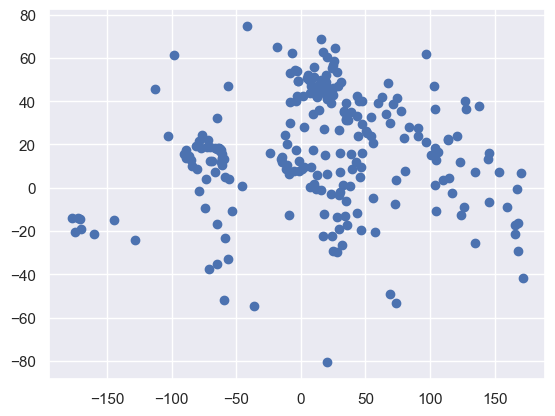

In [11]:
plt.scatter(df['Longitude'],df['Latitude']) #matplotlib.pyplot.scatter(x, y)

In [21]:
cdata = df.iloc[:,1:3]

In [22]:
Kmeans=KMeans(3) #clustering

Kmeans.fit(cdata) #performing clustering



KMeans(n_clusters=3)

In [25]:
identified_clusters = Kmeans.fit_predict(cdata)

In [27]:
country_cluster = df.copy() # make copy of dataframe
country_cluster['cluster_no'] = identified_clusters #add column name cluster_no to the df

In [28]:
country_cluster.head()

,name,Longitude,Latitude,cluster_no
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0


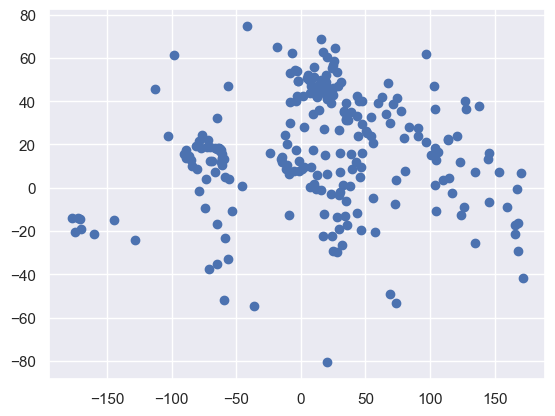

In [37]:
plt.scatter(country_cluster['Longitude'],country_cluster['Latitude'],  cmap='rainbow') #her scatter named country_cluster

In [42]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cdata) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Within-cluster Sum of Squares')

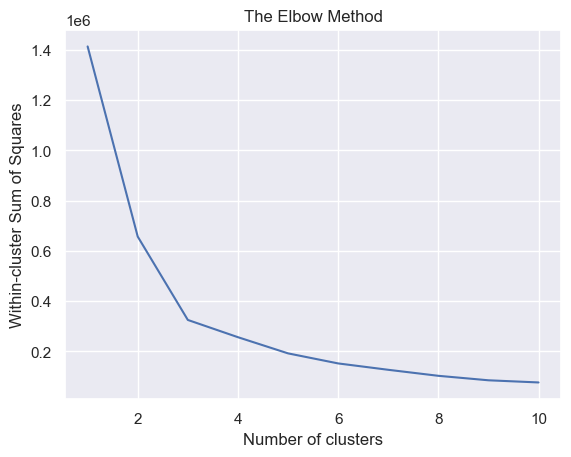

In [44]:
number_clusters = range(1,11) 
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')